In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breast-cancer-wisconsin-data/breast-cancer-wisconsin.data


In [2]:
import matplotlib.pyplot as plt

In [3]:
col_name = ["id number", "clump_thickness", "uniformity_of_cell_size", "uniformity_of_cell_shape",  "marginal_adhesion", "single_epithelial_cell_size",  "bare_nuclei", "bland_chromatin", "normal_nucleoli",  "mitoses", "class"]

df = pd.read_csv("/kaggle/input/breast-cancer-wisconsin-data/breast-cancer-wisconsin.data", names = col_name)
df

,id number,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


# Missing values

In [4]:
def missing_value(df):
    df_col = pd.DataFrame()
    df_col["nom_col"] = df.columns.tolist()
    df_col["type_col"] = df.dtypes.tolist()
    nb_missing_values = df.isnull().sum()
    list_no_val= []
    list_val = []
    percent_val = []
    unique_val = []
    for col in df:
        unique_val.append(len(df[col].unique()))
    
    for i in nb_missing_values:
        list_no_val.append(i)
        list_val.append(len(df)-i)
        percent_val.append((i / df.shape[0])*100)
    
    df_col["unique_val"] = unique_val
    df_col["nb_missing_val"] = list_no_val
    df_col["per_missing_val"] = percent_val
    df_col["nb_val"] = list_val
    return df_col



In [5]:
#calculating the number of missing values for each column
df_col=missing_value(df)
df_col

,nom_col,type_col,unique_val,nb_missing_val,per_missing_val,nb_val
0,id number,int64,645,0,0.0,699
1,clump_thickness,int64,10,0,0.0,699
2,uniformity_of_cell_size,int64,10,0,0.0,699
3,uniformity_of_cell_shape,int64,10,0,0.0,699
4,marginal_adhesion,int64,10,0,0.0,699
5,single_epithelial_cell_size,int64,10,0,0.0,699
6,bare_nuclei,object,11,0,0.0,699
7,bland_chromatin,int64,10,0,0.0,699
8,normal_nucleoli,int64,10,0,0.0,699
9,mitoses,int64,9,0,0.0,699


There are no officially missing values, but the “Bare_Nuclei” column is of object type, which means that it probably contains non-numerical values (perhaps “?” indicating missing values).

In [6]:
df["bare_nuclei"] = pd.to_numeric(df["bare_nuclei"], errors='coerce')

In [7]:
#calculating the number of missing values for each column
df_col=missing_value(df)
df_col

,nom_col,type_col,unique_val,nb_missing_val,per_missing_val,nb_val
0,id number,int64,645,0,0.000000,699
1,clump_thickness,int64,10,0,0.000000,699
2,uniformity_of_cell_size,int64,10,0,0.000000,699
3,uniformity_of_cell_shape,int64,10,0,0.000000,699
4,marginal_adhesion,int64,10,0,0.000000,699
5,single_epithelial_cell_size,int64,10,0,0.000000,699
6,bare_nuclei,float64,11,16,2.288984,683
7,bland_chromatin,int64,10,0,0.000000,699
8,normal_nucleoli,int64,10,0,0.000000,699
9,mitoses,int64,9,0,0.000000,699


In [8]:
df["bare_nuclei"].fillna(df["bare_nuclei"].median(), inplace=True)

# Check if any values are missing
print(df["bare_nuclei"].isnull().sum())

0


<ipython-input-8-bdf8f82107f4>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["bare_nuclei"].fillna(df["bare_nuclei"].median(), inplace=True)


# Normalize data

Target class: The “Class” variable has two values:
+ 2 = Benign
+ 4 = Smart
  
We can convert them into 0 and 1 for Machine Learning.

In [9]:
df["class"] = df["class"].map({2: 0, 4: 1})
print(df["class"].value_counts())

class
0    458
1    241
Name: count, dtype: int64


# Exploratory Data Analysis (EDA)

## Histograms

<Figure size 1500x1000 with 0 Axes>

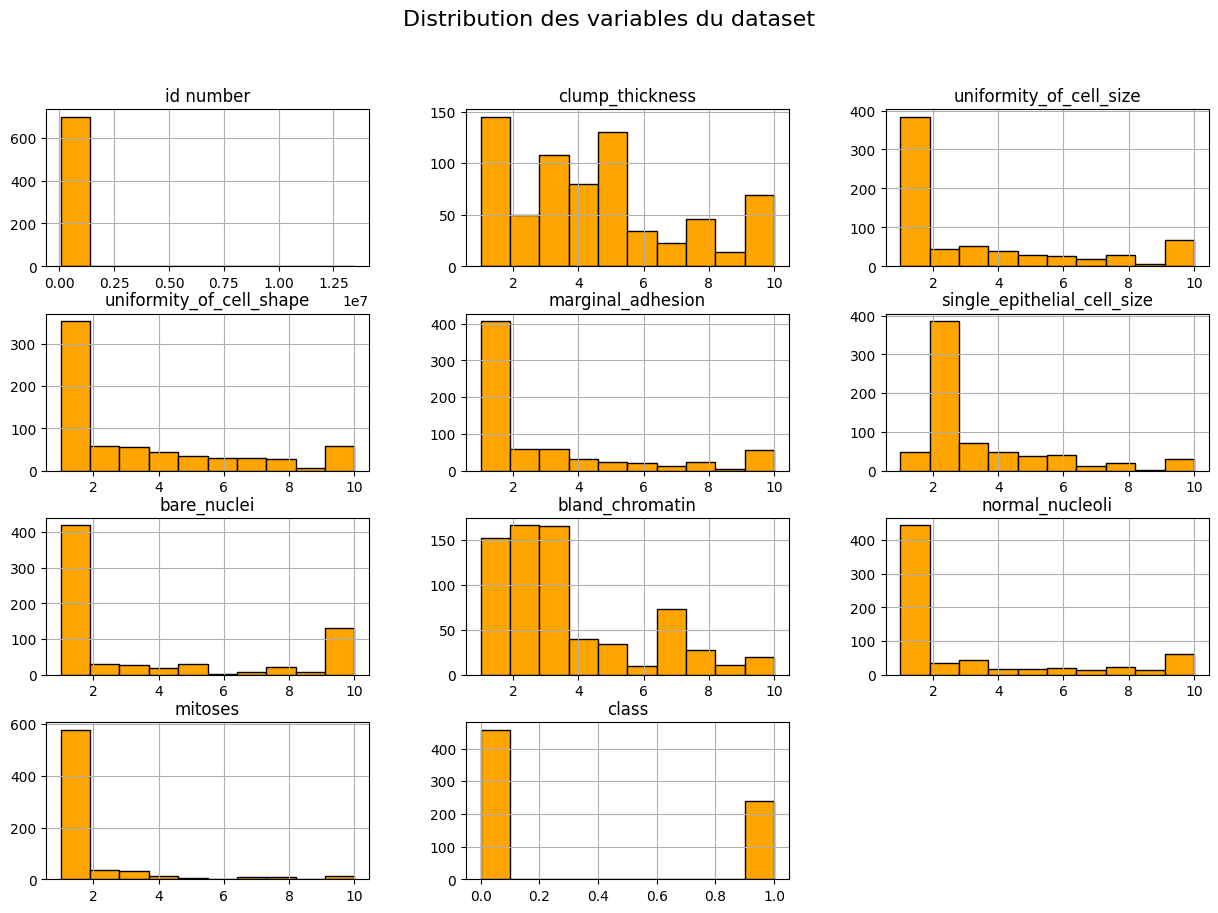

In [10]:
plt.figure(figsize=(15, 10))

# Create histograms for each variable
df.hist(figsize=(15, 10), bins=10, edgecolor='black', color='orange')
plt.suptitle("Distribution des variables du dataset", fontsize=16)
plt.show()

Remarks :
+ Some variables are highly asymmetrical (e.g. “Bare_Nuclei”, “Normal_Nucleoli”), which may require transformation.
+ The “Class” variable (benign vs. malignant) is unbalanced, with more benign cases (class 0).
+ Some features seem to separate the classes well, which is encouraging for machine learning.

## Correlation matrix

Let's generate the correlation matrix to see which variables are the most influential. 

## Box plot